In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from utils import *

In [2]:
datadir = "/root/codespace/quant-finance-lectures/amarstock_adjusted_data/daily"
top20 = get_top20_stocks(path=datadir)
top20names = [i[0] for i in top20]
print(top20names)

['00DS30', '00DSES', '00DSEX', '1JANATAMF', '1STPRIMFMF', 'AAMRANET', 'AAMRATECH', 'ABB1STMF', 'ABBANK', 'ACFL', 'ACI', 'ACIFORMULA', 'ACMELAB', 'ACTIVEFINE', 'ADNTEL', 'ADVENT', 'AFCAGRO', 'AFTABAUTO', 'AGNISYSL', 'AGRANINS']


### Finding Correlated and uncorrelated assets for "00DS30"

In [61]:
corr_matrix = get_correaltion_btwn_assets(assetlist=top20names, datadir=datadir)
top_vs_rest = corr_matrix.loc['00DS30']
correlated_assests, uncorrelated_assests = [], []
for i in range(1, len(top_vs_rest)):
    if top_vs_rest[i] >0.5:
        correlated_assests.append(top_vs_rest.index[i])
        # correlated_assests[top_vs_rest.index[i]] = top_vs_rest[i]
    else:
        # uncorrelated_assests[top_vs_rest.index[i]] = top_vs_rest[i]
        uncorrelated_assests.append(top_vs_rest.index[i])

In [72]:
print(corr_matrix)

              00DS30    00DSES    00DSEX  1JANATAMF  1STPRIMFMF  AAMRANET  \
00DS30      1.000000  0.946330  0.913572  -0.246423   -0.127867       NaN   
00DSES      0.946330  1.000000  0.799367  -0.487880   -0.366291       NaN   
00DSEX      0.913572  0.799367  1.000000   0.037366    0.199911       NaN   
1JANATAMF  -0.246423 -0.487880  0.037366   1.000000    0.887454       NaN   
1STPRIMFMF -0.127867 -0.366291  0.199911   0.887454    1.000000       NaN   
AAMRANET         NaN       NaN       NaN        NaN         NaN       NaN   
AAMRATECH   0.360714  0.276064  0.489147   0.173826    0.351347       NaN   
ABB1STMF   -0.249577 -0.472054  0.054520   0.945064    0.922103       NaN   
ABBANK      0.330078  0.247774  0.569802   0.331245    0.467307       NaN   
ACFL             NaN       NaN       NaN        NaN         NaN       NaN   
ACI         0.494273  0.672146  0.153614  -0.870415   -0.875410       NaN   
ACIFORMULA  0.456032  0.597607  0.137949  -0.740887   -0.797785       NaN   

In [74]:
print(correlated_assests)
print(uncorrelated_assests)
nan_list = ['AAMRANET', 'ACFL', 'ACMELAB', 'ADNTEL', 'ADVENT']

# uncorrelated_assests-nan_list

['00DSES', '00DSEX', 'AGNISYSL']
['1JANATAMF', '1STPRIMFMF', 'AAMRANET', 'AAMRATECH', 'ABB1STMF', 'ABBANK', 'ACFL', 'ACI', 'ACIFORMULA', 'ACMELAB', 'ACTIVEFINE', 'ADNTEL', 'ADVENT', 'AFCAGRO', 'AFTABAUTO', 'AGRANINS']


## Portfolio theory.

Case 1: Investing in Few Assets

In [57]:
startdate, enddate = 510, 960
stockname = '00DS30'
df = get_prices(stockname, path=datadir) 
returns = get_returns(dataframe=df, field='close')[startdate: enddate]
print(returns)

timestamp
2014-02-18 00:00:00+00:00   -0.003839
2014-02-19 00:00:00+00:00    0.018910
2014-02-20 00:00:00+00:00    0.000599
2014-02-23 00:00:00+00:00   -0.012322
2014-02-24 00:00:00+00:00    0.011432
                               ...   
2015-12-24 00:00:00+00:00    0.003797
2015-12-27 00:00:00+00:00    0.000040
2015-12-28 00:00:00+00:00   -0.000246
2015-12-29 00:00:00+00:00   -0.002690
2015-12-30 00:00:00+00:00   -0.000752
Name: close, Length: 450, dtype: float64


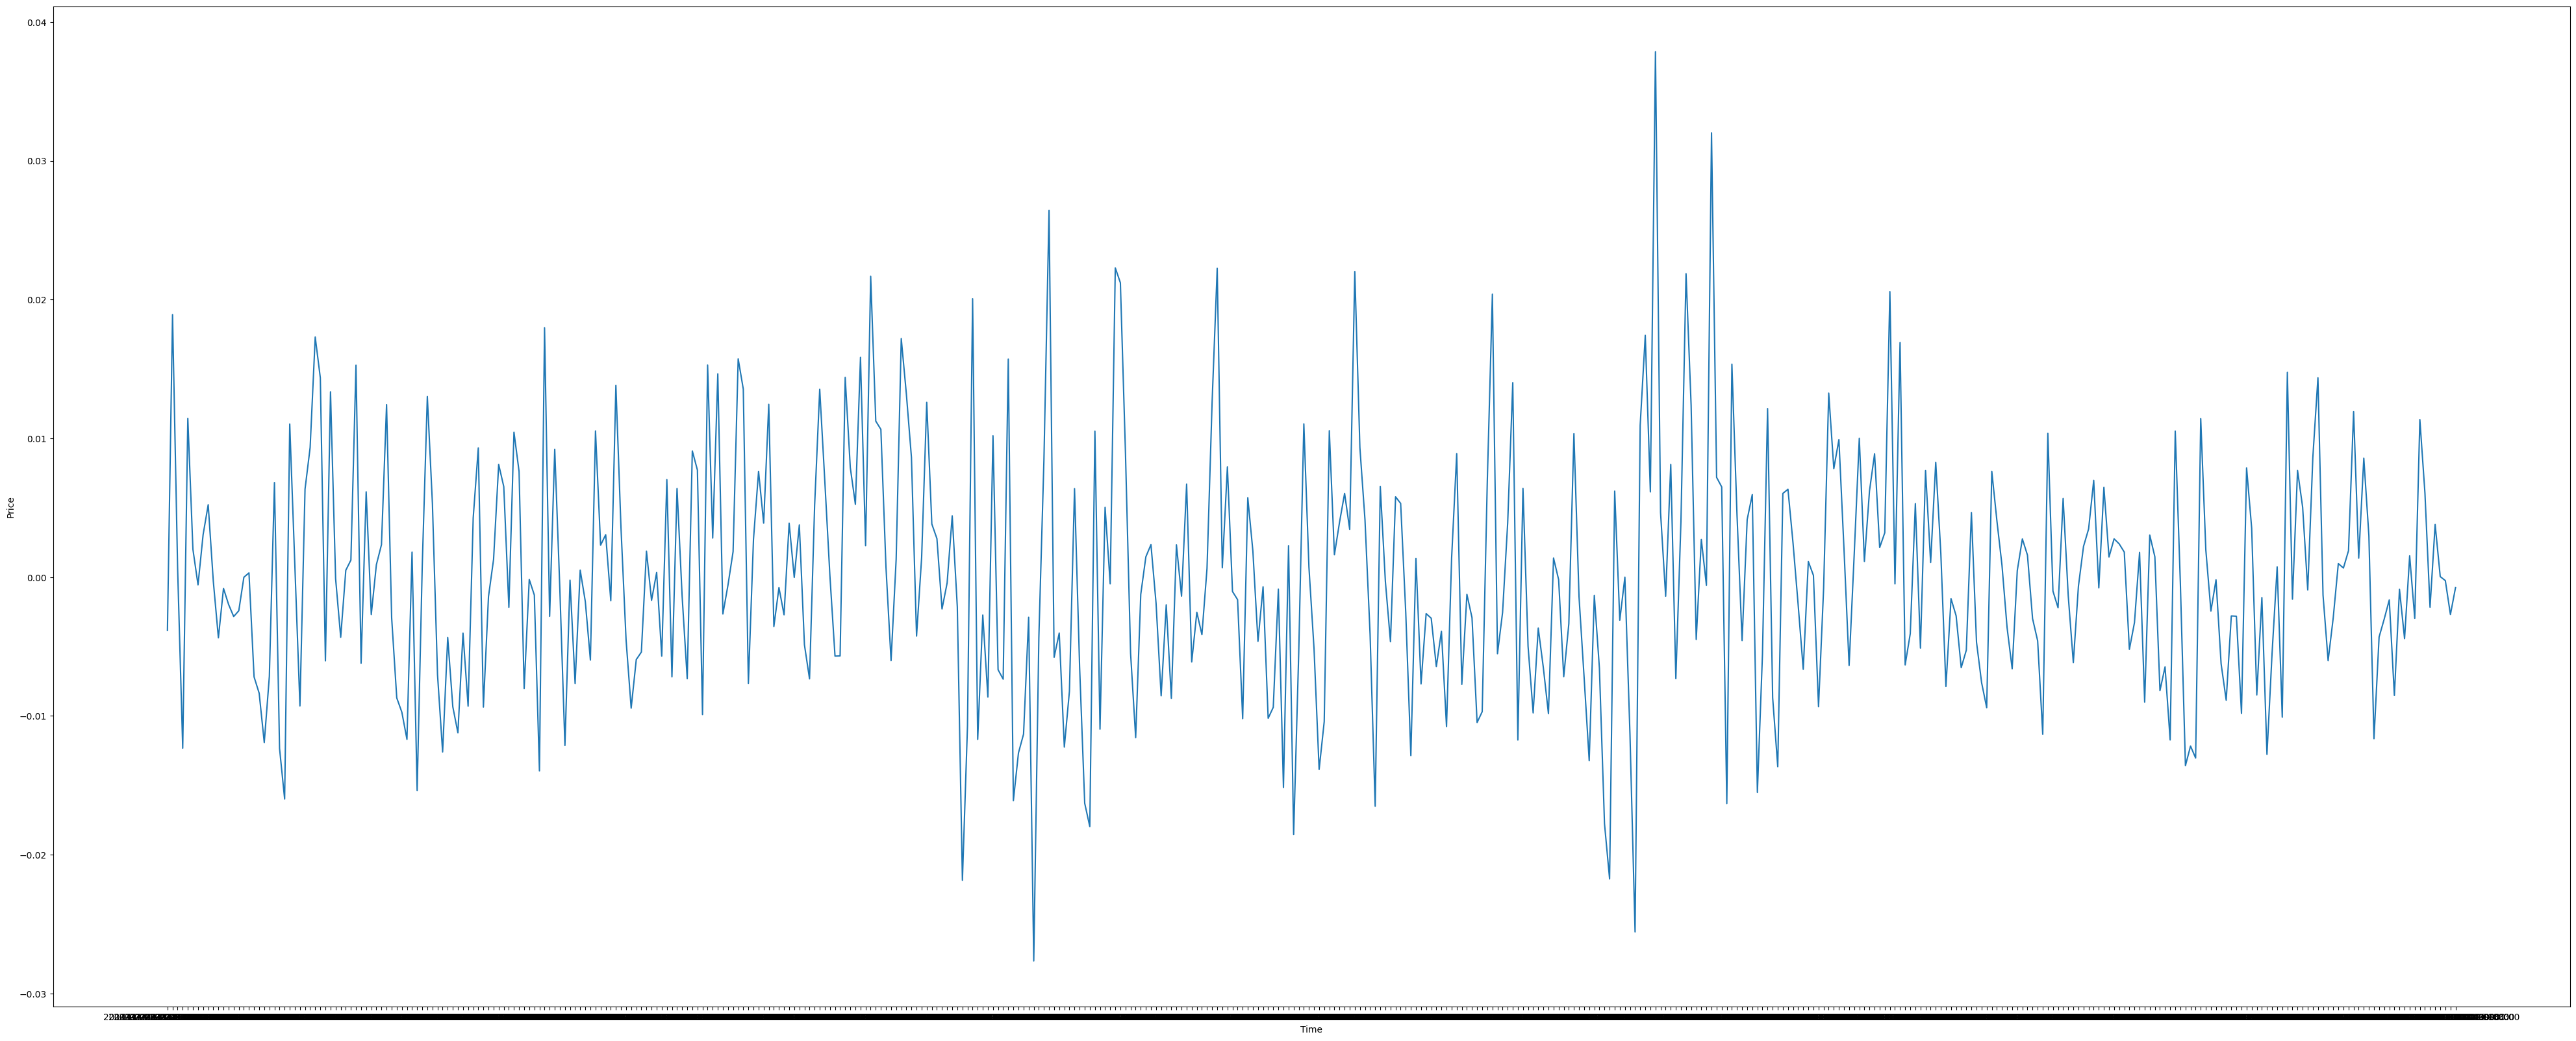

Mean Asset Volatility = 0.0
Portfolio Volatility = 0.00883973904839254



In [58]:
asset1 = returns
portfolio = asset1
plt.figure(figsize=(50,20))
plt.plot(portfolio)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()
# print(f'Asset Volatilities = {[np.std(R) for R in asset1]}')
print(f'Mean Asset Volatility = {np.mean([np.std(R) for R in asset1])}')
print(f'Portfolio Volatility = {np.std(portfolio)}')

In this case, we're totally exposed to the volatility of that asset, as our portfolio is entirely that asset.

Case 2: Investing in Many Correlated Assets

Mean Asset Volatility = 0.010969460582634535
Portfolio Volatility = 0.009310782957801932


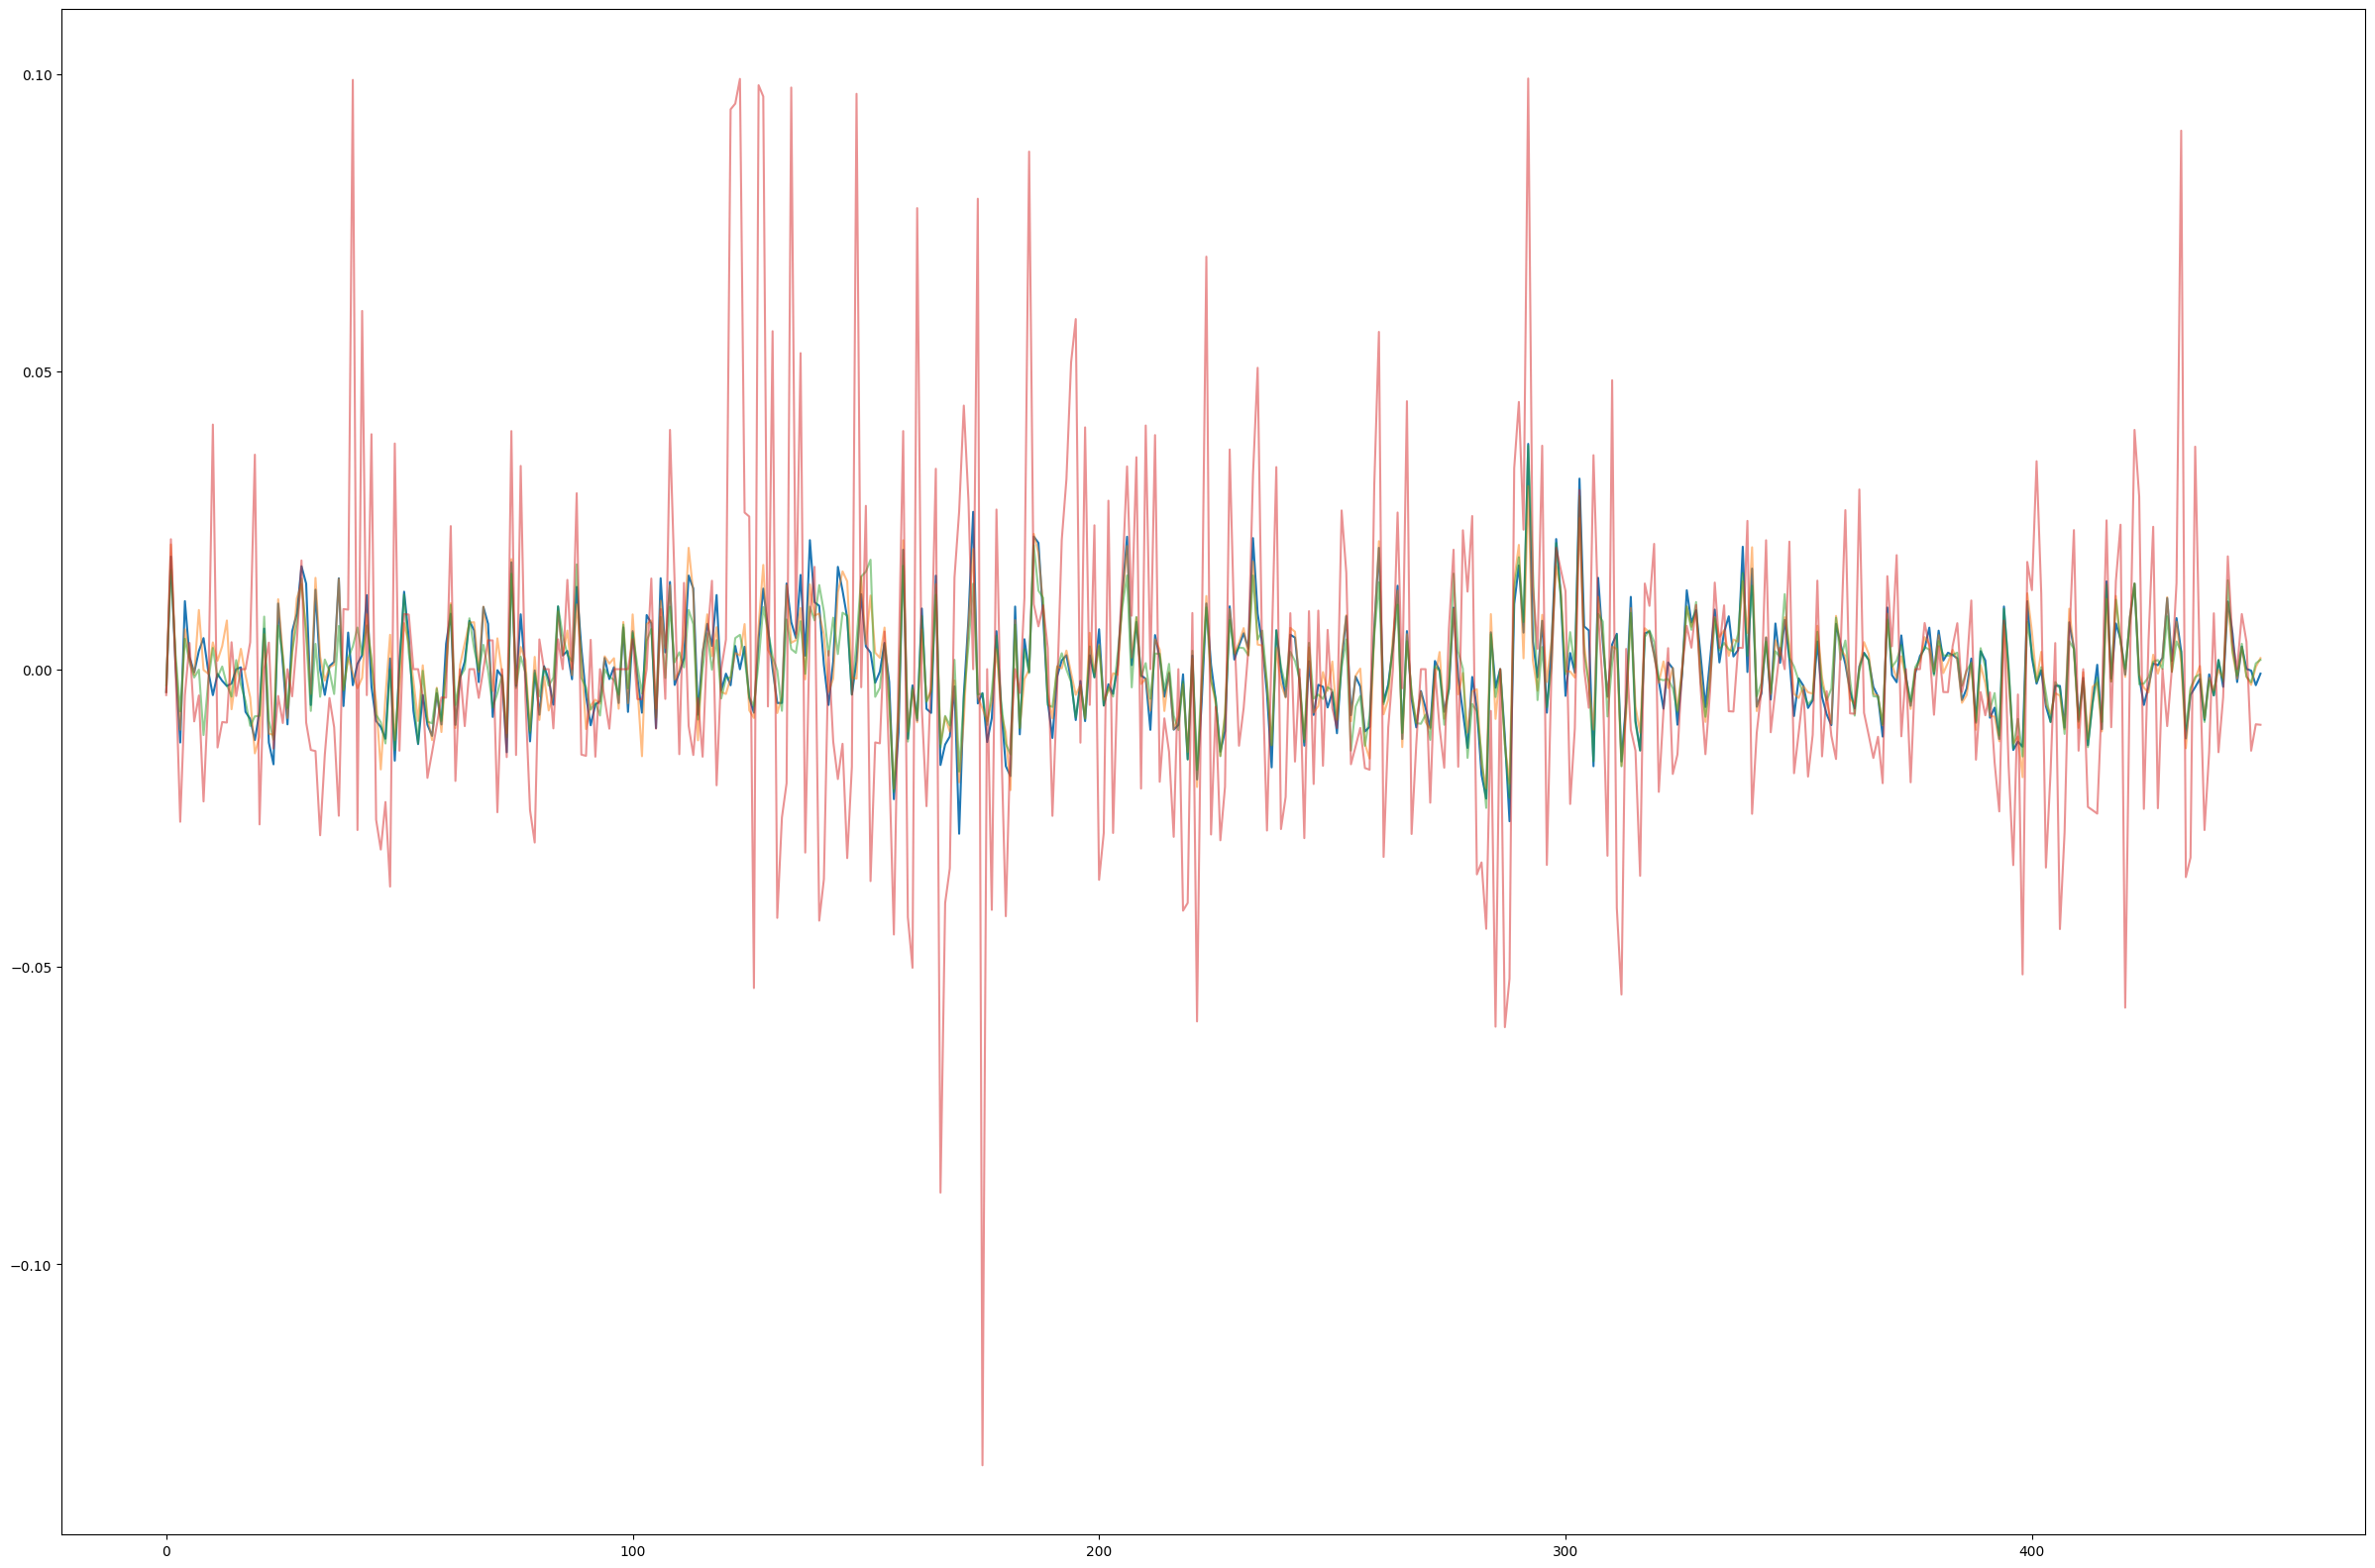

In [76]:
startdate, enddate = 510, 960
assets =np.zeros((len(correlated_assests)+1, enddate-startdate))

plt.figure(figsize=(30,20))
stockname = '00DS30'
df = get_prices(stockname, path=datadir) 
return0 = get_returns(dataframe=df, field='close')[startdate: enddate]
assets[0] = return0
plt.plot(assets[0], label=stockname)

for i in range(len(correlated_assests)):
    df = get_prices(correlated_assests[i], path=datadir) 
    returns = get_returns(dataframe=df, field='close')[startdate: enddate]
    assets[i] = returns
    plt.plot(assets[i], alpha=0.5, label=correlated_assests[i])
 
portfolio =  np.mean(assets, axis=0)    
print(f'Mean Asset Volatility = {np.mean([np.std(R) for R in assets])}')
print(f'Portfolio Volatility = {np.std(portfolio)}')


Case 3: Investing in Many Uncorrelated Assets

Mean Asset Volatility = 0.015086596357147453
Portfolio Volatility = 0.007079534927897698


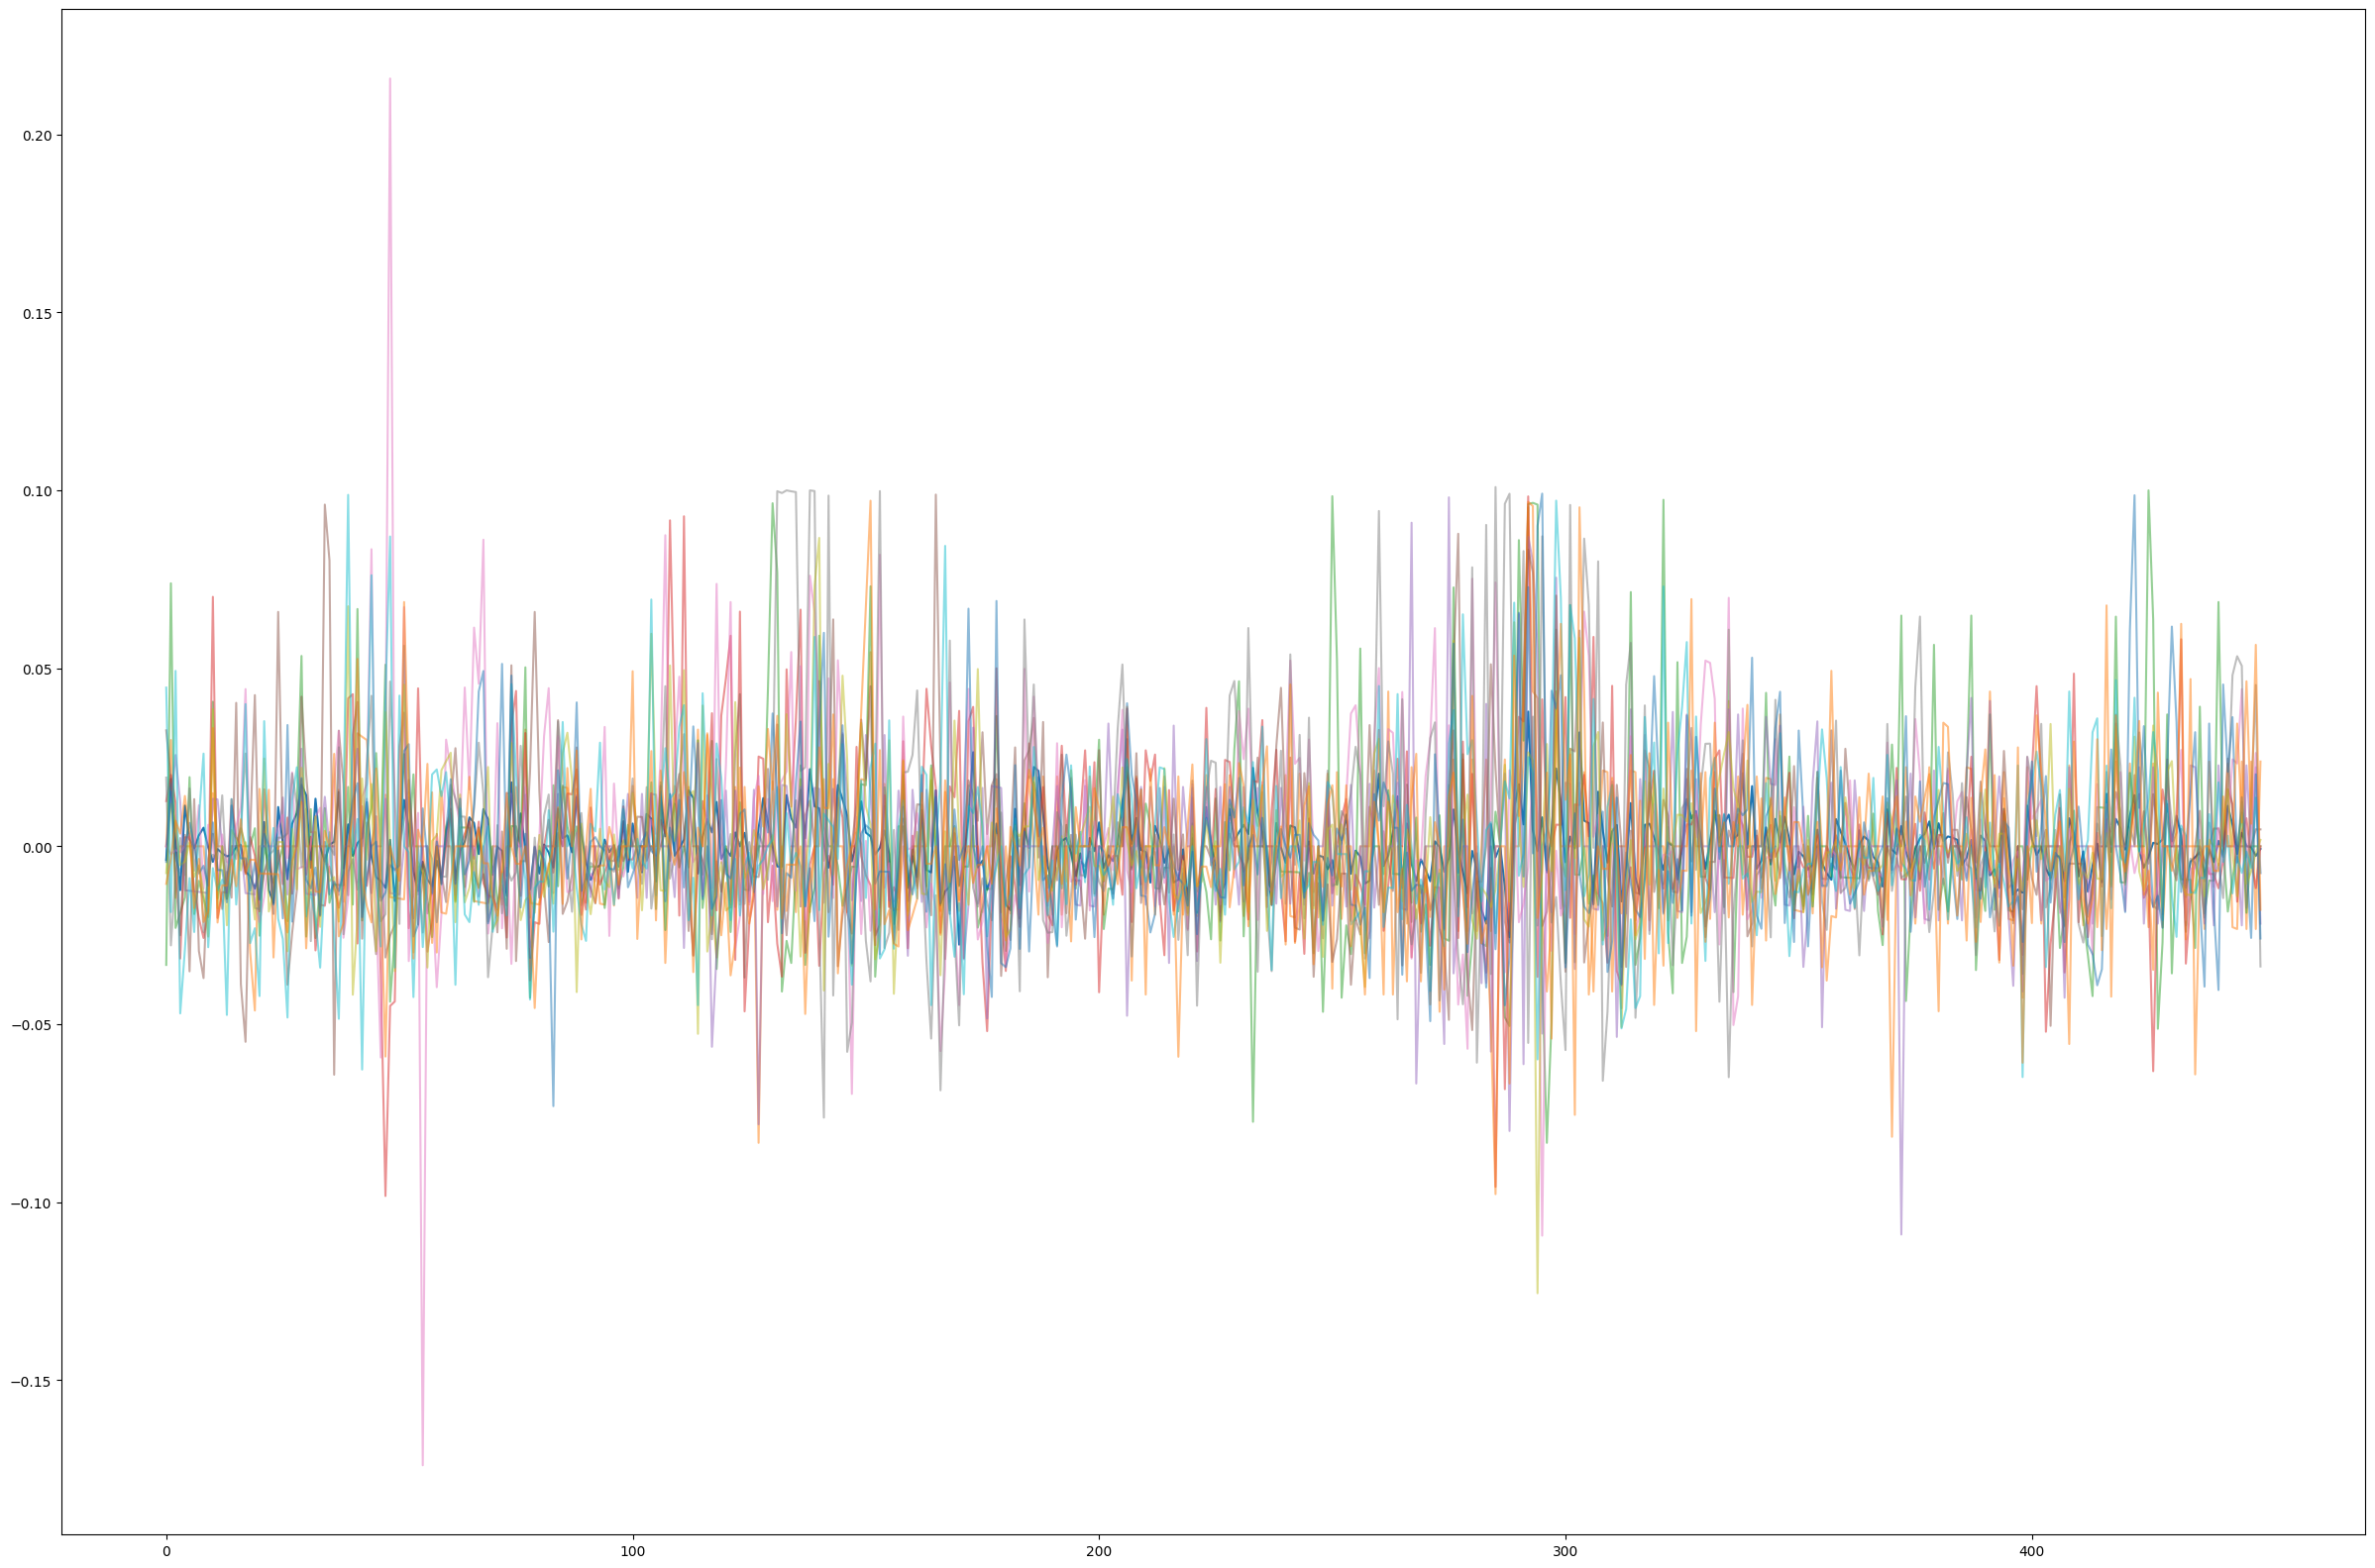

In [77]:
startdate, enddate = 510, 960
assets =np.zeros((len(uncorrelated_assests)+1, enddate-startdate))

plt.figure(figsize=(30,20))
stockname = '00DS30'
df = get_prices(stockname, path=datadir) 
return0 = get_returns(dataframe=df, field='close')[startdate: enddate]
assets[0] = return0
plt.plot(assets[0], label=stockname)

for i in range(len(uncorrelated_assests)):
    if uncorrelated_assests[i] not in nan_list:
        df = get_prices(uncorrelated_assests[i], path=datadir) 
        returns = get_returns(dataframe=df, field='close')[startdate: enddate]
        assets[i] = returns
        plt.plot(assets[i], alpha=0.5, label=uncorrelated_assests[i])
portfolio = np.mean(assets, axis=0)   
print(f'Mean Asset Volatility = {np.mean([np.std(R) for R in assets])}')
print(f'Portfolio Volatility = {np.std(portfolio)}')
